# Exploratory Data Analysis

This notebook provides a starter analysis of financial data, including account states, transactions, and payments. It demonstrates how to load the input data and plots distributions for the population as well as time series for individual agents. This notebook does not do EDA on the labels. That is left up to you.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting import (plot_merchant_type_distribution,
    plot_transaction_amount_distribution,
    plot_event_distribution,
    plot_behavior_over_time,
    display_table_info,
    plot_merchant_id_distribution)

In [4]:
# Load data
account_state_log = pd.read_csv('./Datasets/account_state_log.csv')
transactions_log = pd.read_csv('./Datasets/transactions_log.csv', parse_dates=['timestamp'])
payments_log = pd.read_csv('./Datasets/payments_log.csv', parse_dates=['timestamp'])
labels = pd.read_csv('./Datasets/labels.csv')

In [5]:
account_state_log.head()

,agent_id,credit_balance,credit_utilization,interest_rate,min_payment_factor,current_missed_payments,timestamp
0,839,367.017294,0.367,0.191914,0.05,0,2023-01-01
1,179,638.371473,0.638,0.191758,0.05,0,2023-01-01
2,645,652.219191,0.326,0.235719,0.05,0,2023-01-01
3,170,777.674485,0.078,0.234455,0.05,0,2023-01-01
4,152,634.101608,0.317,0.247455,0.05,0,2023-01-01


In [6]:
# Display information for each table
display_table_info(account_state_log, 'account_state_log')
display_table_info(transactions_log, 'transactions_log')
display_table_info(payments_log, 'payments_log')
display_table_info(labels, 'labels')

Schema and attributes of account_state_log:
   agent_id  credit_balance  credit_utilization  interest_rate  \
0       839      367.017294               0.367       0.191914   
1       179      638.371473               0.638       0.191758   
2       645      652.219191               0.326       0.235719   
3       170      777.674485               0.078       0.234455   
4       152      634.101608               0.317       0.247455   

   min_payment_factor  current_missed_payments   timestamp  
0                0.05                        0  2023-01-01  
1                0.05                        0  2023-01-01  
2                0.05                        0  2023-01-01  
3                0.05                        0  2023-01-01  
4                0.05                        0  2023-01-01   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373225 entries, 0 to 373224
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------               

# Population Level Analysis

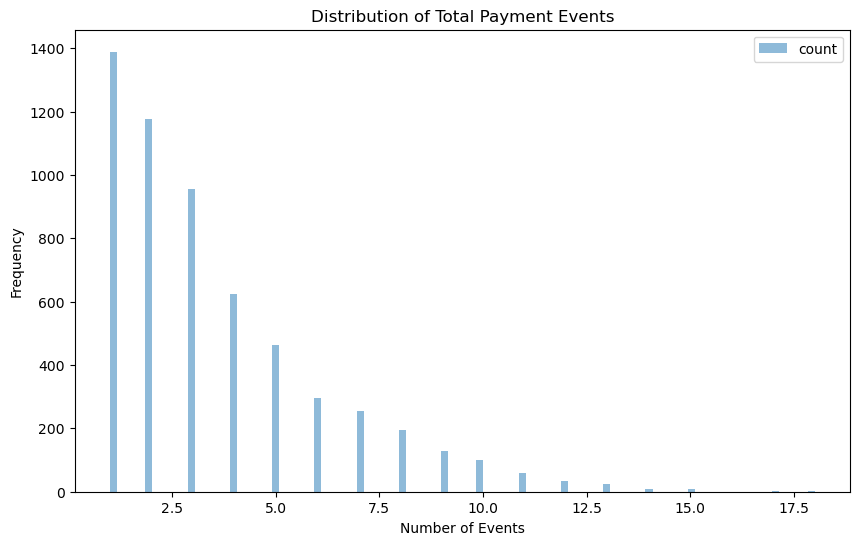

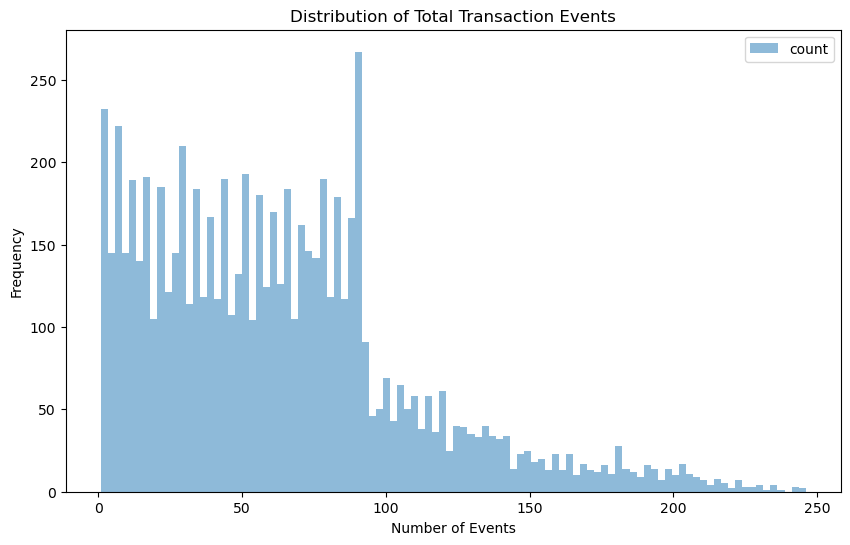

In [7]:
plot_event_distribution(payments_log, 'agent_id', 'Distribution of Total Payment Events', 'Number of Events')
plot_event_distribution(transactions_log, 'agent_id', 'Distribution of Total Transaction Events', 'Number of Events')

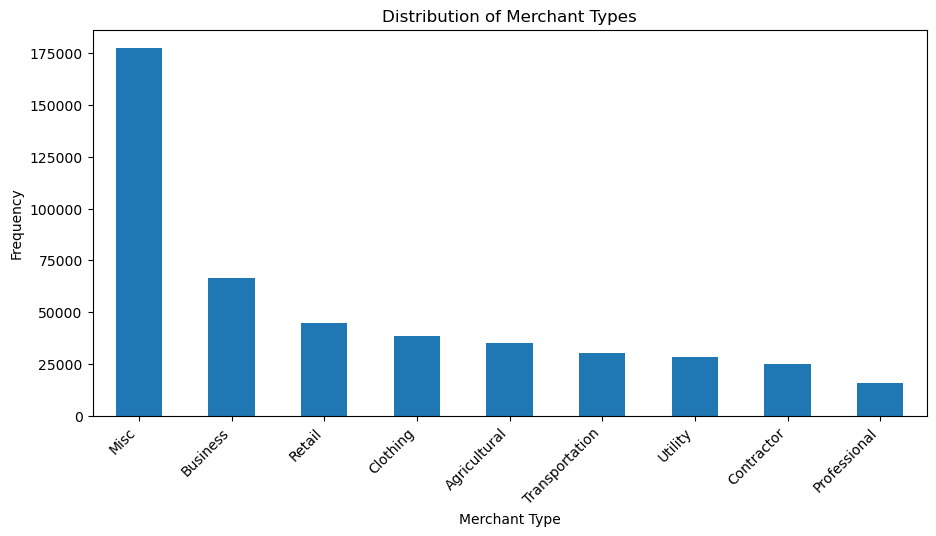

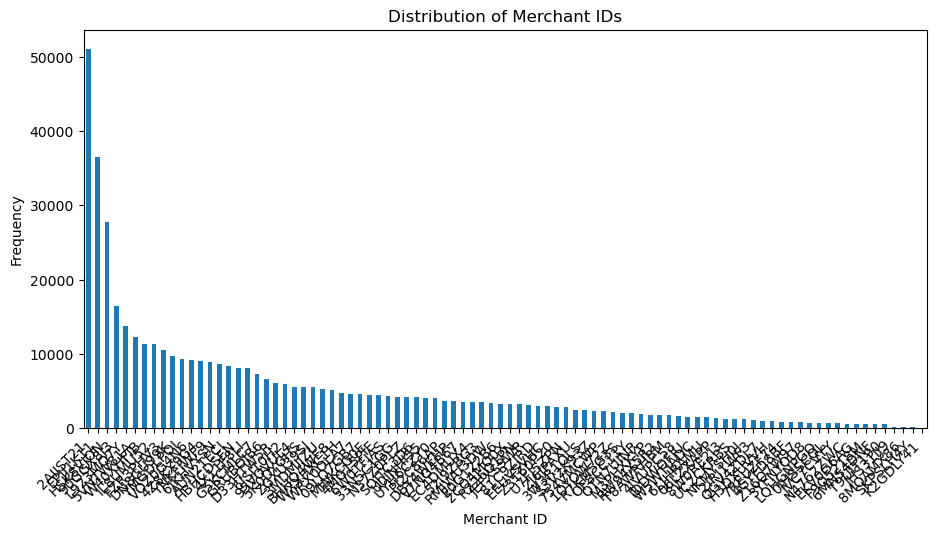

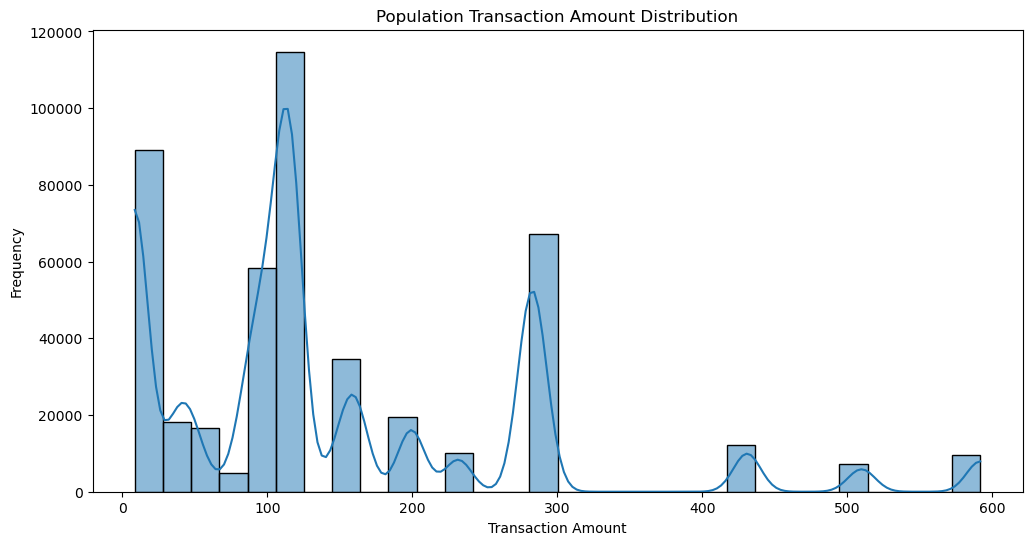

In [8]:
plot_merchant_type_distribution(transactions_log)
plot_merchant_id_distribution(transactions_log)
plot_transaction_amount_distribution(transactions_log)

Note in the following plots that different agents have time series that start at different points. This corresponds to credit cards opening at different times.

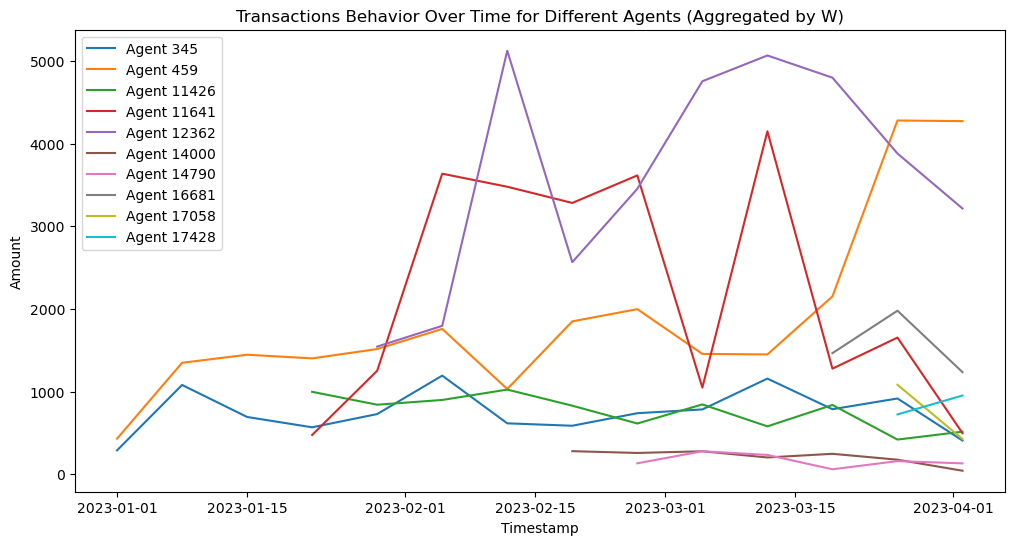

/Users/deepanshumody/Documents/github/BeyondTheHype/Beyond_The_Hype/plotting.py:192: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  agent_log_resampled = agent_log['amount'].resample(period).sum()


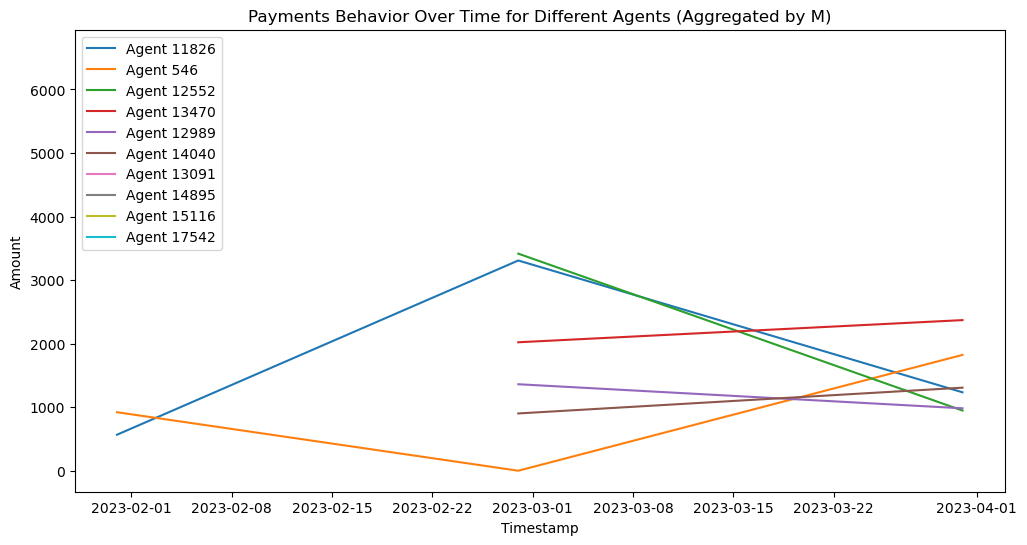

In [9]:
plot_behavior_over_time(transactions_log, sample_size=10, period='W', data_type='transactions')  # For transactions
plot_behavior_over_time(payments_log, sample_size=10, period='M', data_type='payments')  # For payments

In [17]:
account_state_log['timestamp'] = pd.to_datetime(account_state_log['timestamp'])
payments_log['timestamp'] = pd.to_datetime(payments_log['timestamp'])
transactions_log['timestamp'] = pd.to_datetime(transactions_log['timestamp'])

payments_aggregated = payments_log.groupby([
    'agent_id',
    payments_log['timestamp'].dt.to_period('D')
]).agg(
    total_payments=('amount', 'sum'),
    payment_count=('amount', 'count'),
    avg_payment=('amount', 'mean')
).reset_index()

payments_aggregated['timestamp'] = payments_aggregated['timestamp'].dt.to_timestamp()

transactions_aggregated = transactions_log.groupby([
    'agent_id',
    transactions_log['timestamp'].dt.to_period('D')
]).agg(
    total_transactions=('amount', 'sum'),
    transaction_count=('amount', 'count'),
    avg_transaction=('amount', 'mean'),
    online_count=('online', 'sum')
).reset_index()

transactions_aggregated['timestamp'] = transactions_aggregated['timestamp'].dt.to_timestamp()

aggregated_data = pd.merge(payments_aggregated, transactions_aggregated, on=['agent_id', 'timestamp'], how='outer')

final_merged_data = pd.merge(account_state_log, aggregated_data, on=['agent_id', 'timestamp'], how='left')

final_merged_data[final_merged_data['agent_id']==839]


,agent_id,credit_balance,credit_utilization,interest_rate,min_payment_factor,current_missed_payments,timestamp,total_payments,payment_count,avg_payment,total_transactions,transaction_count,avg_transaction,online_count
0,839,367.017294,0.367,0.191914,0.05,0,2023-01-01,NaN,NaN,NaN,8.64,1.0,8.6400,0.0
886,839,375.657294,0.376,0.216914,0.05,0,2023-01-02,NaN,NaN,NaN,8.64,1.0,8.6400,0.0
1789,839,384.297294,0.384,0.216914,0.05,0,2023-01-03,NaN,NaN,NaN,8.64,1.0,8.6400,1.0
2811,839,392.937294,0.393,0.216914,0.05,0,2023-01-04,NaN,NaN,NaN,8.64,1.0,8.6400,0.0
4507,839,401.577294,0.402,0.216914,0.05,0,2023-01-05,NaN,NaN,NaN,8.64,1.0,8.6400,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341874,839,994.827294,0.995,0.216914,0.05,0,2023-03-28,NaN,NaN,NaN,868.82,4.0,217.2050,2.0
349016,839,994.827294,0.995,0.216914,0.05,0,2023-03-29,NaN,NaN,NaN,395.96,2.0,197.9800,2.0
351536,839,994.827294,0.995,0.216914,0.05,0,2023-03-30,NaN,NaN,NaN,756.07,4.0,189.0175,1.0
364647,839,994.827294,0.995,0.216914,0.05,0,2023-03-31,NaN,NaN,NaN,706.14,2.0,353.0700,0.0


In [ ]:
# Merge with labels.csv to include charge-off information
final_dataset = pd.merge(final_merged_data, labels, on='agent_id', how='left')

# Fill missing values in aggregated columns with zeros (no transactions or payments)
aggregated_columns = ['total_payments', 'payment_count', 'avg_payment',
                      'total_transactions', 'transaction_count', 'avg_transaction', 'online_count']

final_dataset[aggregated_columns] = final_dataset[aggregated_columns].fillna(0)

